**Computación Cuántica II**
# Sebastián González Juárez
Práctica de laboratorio 1.

In [1]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=236116e6375740ec32d3d27bb928e88aabc3866262ff3ba8f1e37ee4e8ab322c
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 61.9 MB/s eta 0:00:00


In [8]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [9]:
# Backend
backend = Aer.get_backend("aer_simulator")

# **1: Fabricar el circuito cuántico para $|\Phi^{-}\rangle$ y $|\Psi^{-}\rangle$ y recuperar tanto las mediciones como el statevector**

Recordemos los Estados de Bell:

$|\Phi^{+}\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$


$|\Phi^{-}\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle - |11\rangle\right)$


$|\Psi^{+}\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle\right)$

$|\Psi^{-}\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle - |10\rangle\right)$

## **$|\Phi^{-}\rangle$**

In [10]:
phi_minus = QuantumCircuit(2)

phi_minus.h(0)
phi_minus.cx(0,1)
phi_minus.z(0)

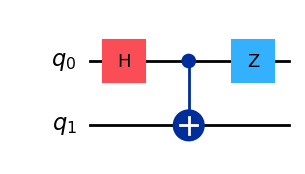

In [11]:
phi_minus.draw("mpl")

Statevector:

In [13]:
sv_phi_minus = Statevector.from_instruction(phi_minus)
print(sv_phi_minus)

Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))


Medición:

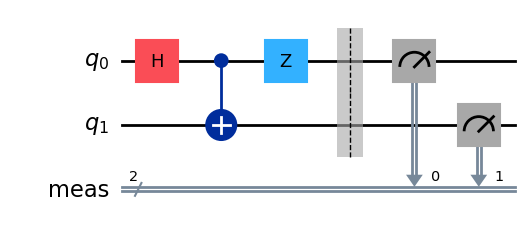

In [14]:
phi_minus_meas = phi_minus.copy()
phi_minus_meas.measure_all()

phi_minus_meas.draw("mpl")

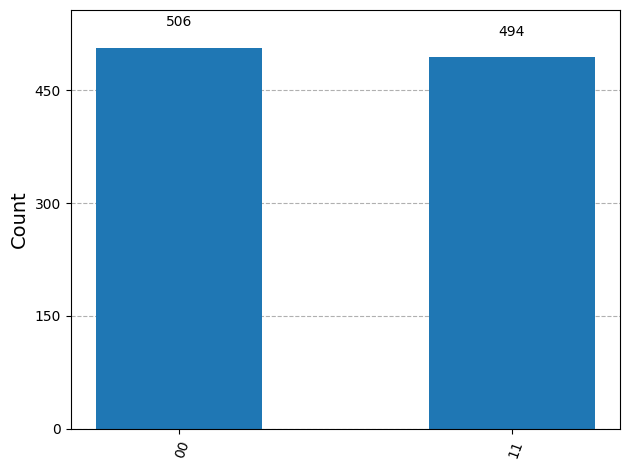

In [15]:
job = backend.run(phi_minus_meas, shots=1000)
counts = job.result().get_counts()
plot_histogram(counts)

## **$|\Psi^{-}\rangle$**

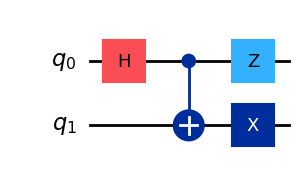

In [16]:
psi_minus = QuantumCircuit(2)

psi_minus.h(0)
psi_minus.cx(0,1)
psi_minus.x(1)
psi_minus.z(0)

psi_minus.draw("mpl")

Statevector:

In [17]:
sv_psi_minus = Statevector.from_instruction(psi_minus)
print(sv_psi_minus)

Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


Mediciones:

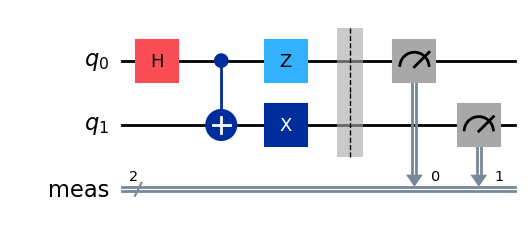

In [19]:
psi_minus_meas = psi_minus.copy()
psi_minus_meas.measure_all()

psi_minus_meas.draw("mpl")

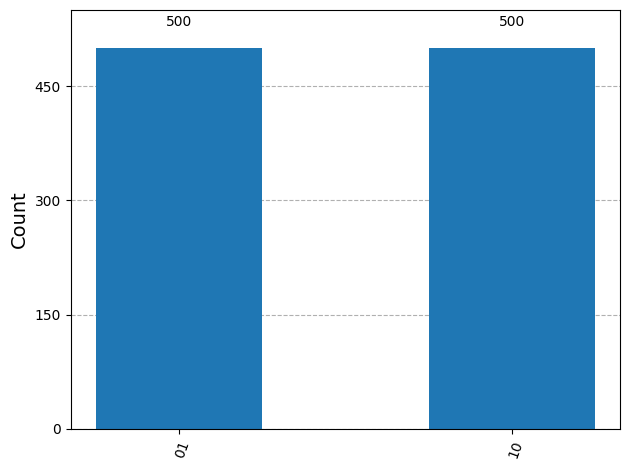

In [20]:
job = backend.run(psi_minus_meas, shots=1000)
counts = job.result().get_counts()
plot_histogram(counts)

# **2: Investigar que es una fase global en un sistema cuántico y explicarmelo con tus propias palabres y que ademas lo expliquen con un ejemeplo**


Si un estado cuántico es: $|\psi\rangle$

Y lo multiplicamos por un factor complejo de la forma: $e^{i\theta}$

Entonces obtenemos: $|\psi'\rangle = e^{i\theta} |\psi\rangle$

Este nuevo estado no cambia ninguna probabilidad de medición. Una fase global es un factor complejo que multiplica todo el estado cuántico.  
No altera las probabilidades de medición, por lo tanto físicamente es indistinguible del estado original.

Ejemplo.

Si: $|\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$

Y multiplicamos por -1: $-|\psi\rangle = -\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$

Las probabilidades siguen siendo:$P(0) = \frac{1}{2}, \quad P(1) = \frac{1}{2}$

El experimento no detecta el signo global.

Cabe destacar una dif. importante muy resumida:
* Fase global: no observable físicamente  
* Fase relativa: sí afecta interferencia y resultados experimentales

Construimos el estado para un ejemplo:

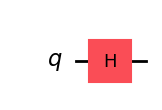

In [21]:
qc = QuantumCircuit(1)
qc.h(0)

qc.draw("mpl")

Obtenemos el statevector:

In [22]:
sv = Statevector.from_instruction(qc)
print("Estado original:")
print(sv)

Estado original:
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


Aplicamos una fase global (multiplicamos por -1):

In [23]:
sv_global = -1 * sv

print("Estado con fase global (-1):")
print(sv_global)

Estado con fase global (-1):
Statevector([-0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


Comprobamos que las probabilidades son iguales:

In [24]:
print("Probabilidades estado original:")
print(sv.probabilities())

print("Probabilidades con fase global:")
print(sv_global.probabilities())

Probabilidades estado original:
[0.5 0.5]
Probabilidades con fase global:
[0.5 0.5]


Esfera de Bloch:

In [26]:
from qiskit.visualization import plot_bloch_multivector

Bloch del estado original:


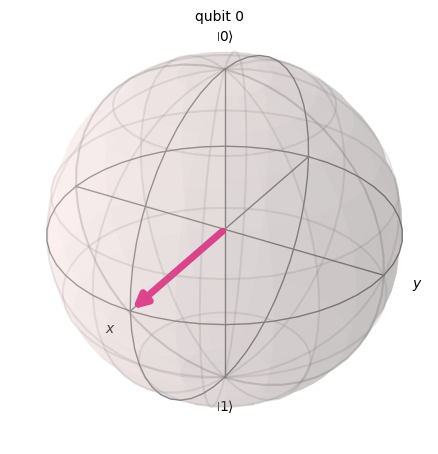

In [27]:
print("Bloch del estado original:")
plot_bloch_multivector(sv)

Bloch con fase global:


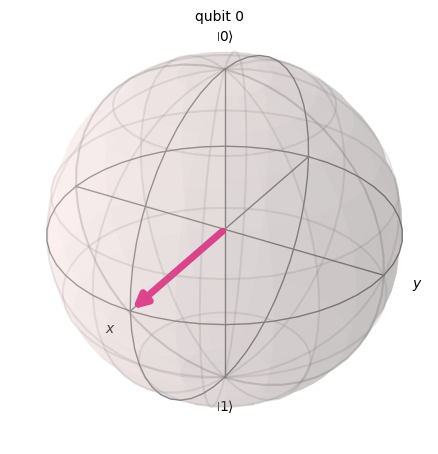

In [28]:
print("Bloch con fase global:")
plot_bloch_multivector(sv_global)

Esto demuestra visualmente que la fase global no cambia el estado físico.

# **3: Fabriquen un circuito usando por lo menos un sistema de 3 qubits y 5 compuertas, desarrollen matemáticamente el circuito para predecir que es lo que esperarían en las mediciones y corran las mediciones en qiskit. Recuerden que Qiskit invierte el orden del sistema.**

## Estado inicial:

$$|\psi_0\rangle = |000\rangle$$

In [58]:
qc = QuantumCircuit(3)
sv = Statevector.from_label('000')
print("Estado inicial:")
print(sv)

Estado inicial:
Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


## Aplicamos H(0):

$$H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$

$$|000\rangle \rightarrow
\frac{1}{\sqrt{2}}(|000\rangle + |100\rangle)$$

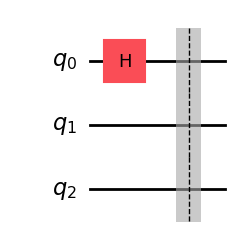

In [59]:
qc.h(0)
qc.barrier()

qc.draw("mpl")

In [60]:
sv = Statevector.from_instruction(qc)
print("Statevector después de H(0):")
print(sv)

Statevector después de H(0):
Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))


## Aplicamos CX(0,1):

$$\frac{1}{\sqrt{2}}(|000\rangle + |100\rangle)
\rightarrow
\frac{1}{\sqrt{2}}(|000\rangle + |110\rangle)$$

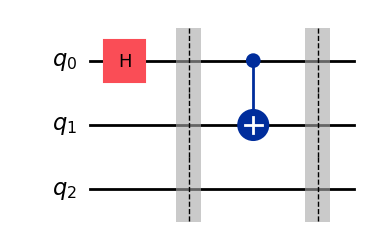

In [61]:
qc.cx(0,1)
qc.barrier()

qc.draw("mpl")

In [62]:
sv = Statevector.from_instruction(qc)
print("Statevector después de CX(0,1):")
print(sv)

Statevector después de CX(0,1):
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))


## Aplicamos CX(1,2):

$$\frac{1}{\sqrt{2}}(|000\rangle + |110\rangle)
\rightarrow
\frac{1}{\sqrt{2}}(|000\rangle + |111\rangle)$$

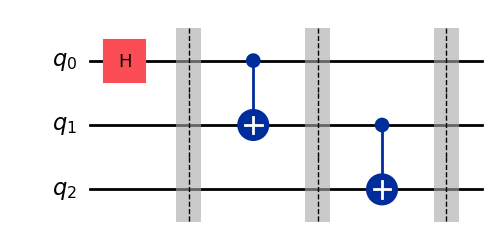

In [63]:
qc.cx(1,2)
qc.barrier()

qc.draw("mpl")

In [64]:
sv = Statevector.from_instruction(qc)
print("Statevector después de CX(1,2):")
print(sv)

Statevector después de CX(1,2):
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


## Aplicamos Z(2):

$$\frac{1}{\sqrt{2}}(|000\rangle + |111\rangle)
\rightarrow
\frac{1}{\sqrt{2}}(|000\rangle - |111\rangle)$$

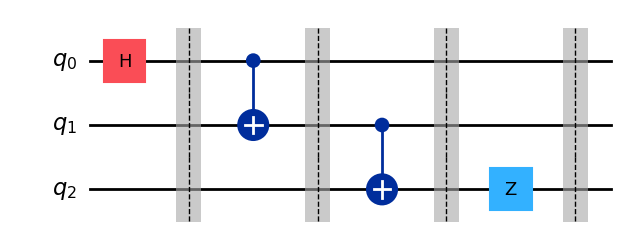

In [65]:
qc.z(2)
qc.barrier()

qc.draw("mpl")

In [66]:
sv = Statevector.from_instruction(qc)
print("Statevector después de Z(2):")
print(sv)

Statevector después de Z(2):
Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j, -0.70710678+0.j],
            dims=(2, 2, 2))


## Aplicamos RX(π/2,0):

$$RX(\theta) = e^{-i\theta X/2}$$

$$RX(\pi/2)|0\rangle =
\cos(\pi/4)|0\rangle - i\sin(\pi/4)|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)$$



In [67]:
import numpy as np

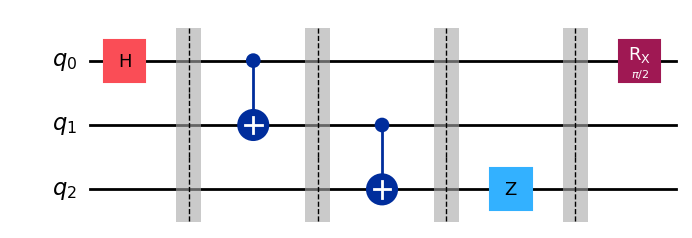

In [68]:
qc.rx(np.pi/2, 0)

qc.draw("mpl")

In [69]:
sv = Statevector.from_instruction(qc)
print("Statevector final:")
print(sv)

Statevector final:
Statevector([ 0.5+0.j ,  0. -0.5j,  0. +0.j ,  0. +0.j ,  0. +0.j ,
              0. +0.j ,  0. +0.5j, -0.5+0.j ],
            dims=(2, 2, 2))


## De este modo tenemos:


Circuito aplicado:

$$H(0) \rightarrow CX(0,1) \rightarrow CX(1,2) \rightarrow Z(2) \rightarrow RX(\pi/2,0)$$


Estado inicial

$$|\psi_0\rangle = |000\rangle$$

Paso 1:

$$H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$

$$|000\rangle = |0\rangle \otimes |00\rangle$$

$$H(0)|000\rangle =
\left( \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \right) \otimes |00\rangle$$

$$|\psi_1\rangle =
\frac{1}{\sqrt{2}}(|000\rangle + |100\rangle)$$

Paso 2:

$$CX(0,1)|000\rangle = |000\rangle$$

$$CX(0,1)|100\rangle = |110\rangle$$

$$|\psi_2\rangle =
\frac{1}{\sqrt{2}}(|000\rangle + |110\rangle)$$

Paso 3:

$$CX(1,2)|000\rangle = |000\rangle$$

$$CX(1,2)|110\rangle = |111\rangle$$

$$|\psi_3\rangle =
\frac{1}{\sqrt{2}}(|000\rangle + |111\rangle)$$

Paso 4:

$$Z|0\rangle = |0\rangle$$

$$Z|1\rangle = -|1\rangle$$

$$Z(2)|000\rangle = |000\rangle$$

$$Z(2)|111\rangle = -|111\rangle$$

$$|\psi_4\rangle =
\frac{1}{\sqrt{2}}(|000\rangle - |111\rangle)$$

Paso 5:

$$RX(\theta) = \cos(\theta/2)I - i\sin(\theta/2)X$$

$$\cos(\pi/4)=\sin(\pi/4)=\frac{1}{\sqrt{2}}$$

$$RX(\pi/2) = \frac{1}{\sqrt{2}}(I - iX)$$

$$RX(\pi/2)|0\rangle =
\frac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)$$

$$RX(\pi/2)|1\rangle =
\frac{1}{\sqrt{2}}(|1\rangle - i|0\rangle)$$

$$|\psi_4\rangle =
\frac{1}{\sqrt{2}}(|000\rangle - |111\rangle)$$

$$RX(0)|000\rangle =
\left( \frac{1}{\sqrt{2}}(|0\rangle - i|1\rangle) \right)\otimes |00\rangle=
\frac{1}{\sqrt{2}}(|000\rangle - i|100\rangle)$$

$$RX(0)|111\rangle =
\left( \frac{1}{\sqrt{2}}(|1\rangle - i|0\rangle) \right)\otimes |11\rangle=
\frac{1}{\sqrt{2}}(|111\rangle - i|011\rangle)$$

$$|\psi_f\rangle =
\frac{1}{\sqrt{2}}
\left[
\frac{1}{\sqrt{2}}(|000\rangle - i|100\rangle)
-
\frac{1}{\sqrt{2}}(|111\rangle - i|011\rangle)
\right]$$

$$|\psi_f\rangle =
\frac{1}{2}
\left[
|000\rangle - i|100\rangle - |111\rangle + i|011\rangle
\right]$$

$$|\psi_f\rangle =
\frac{1}{2}
\left(
|000\rangle - i|100\rangle + i|011\rangle - |111\rangle
\right)$$

Por lo que las cuatro amplitudes tienen magnitud
$1/2$, entonces en el histograma con muchos shots, esperamos ~25% en cada uno de esos cuatro resultados.

## Mediciones:

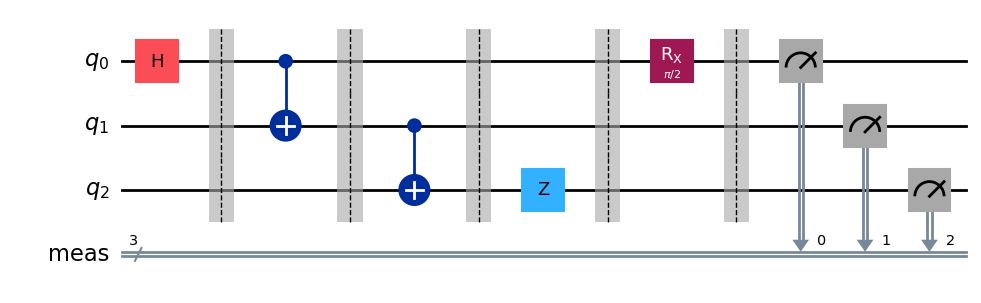

{'111': 247, '001': 261, '000': 240, '110': 252}

In [70]:
qc_meas = qc.copy()
qc_meas.measure_all()

display(qc_meas.draw("mpl"))

job = backend.run(qc_meas, shots=1000)
counts = job.result().get_counts()
counts

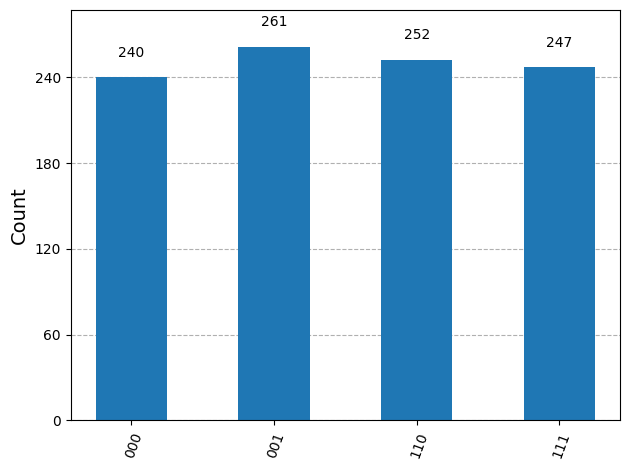

In [71]:
plot_histogram(counts)

Estuvimos en lo  correcto.